In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_wine()
x, y = dataset.data, dataset.target

In [3]:
df = pd.DataFrame(x, columns = dataset.feature_names)
df["y"] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Cart Classifier

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state=42)


In [5]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8, 10],
    'min_samples_split': [1, 2, 4], # Wie viele Samples müssen noch in diesen Split gehen, um diesen zu erstellen?
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf, parameters, cv = 10, n_jobs = -1)
grid_cv.fit(x_train, y_train)

c:\Users\gutsc\anaconda3\envs\TF_CUDA_cuDNN_working\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gutsc\anaconda3\envs\TF_CUDA_cuDNN_working\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gutsc\anaconda3\envs\TF_CUDA_cuDNN_working\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\gutsc\anaconda3\envs\TF_CUDA_cuDNN_working\lib\site-packages\sklearn\tree\_classes.py", line 250

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 4]})

In [6]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

Parameters of best model: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4}
Score of best model: 0.9365384615384615


In [7]:
# Train best model
clf = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=4, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=2)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.8703703703703703


In [8]:
dataset.feature_names, type(dataset.feature_names)

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 list)

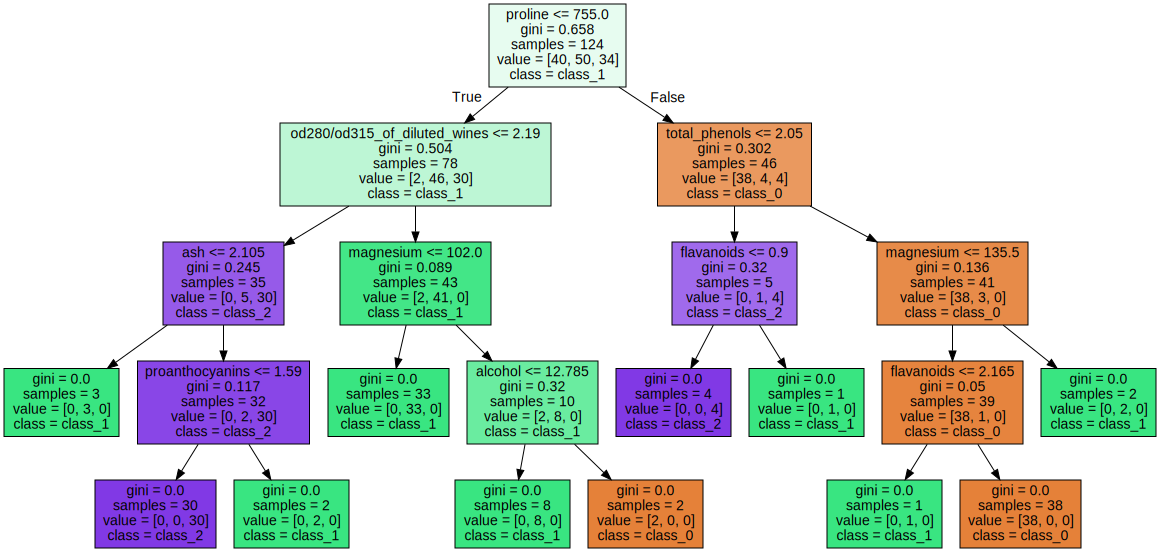

In [11]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=dataset.feature_names,  
                                class_names=dataset.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [12]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'